In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep, ystep, unit=False, plot_streamlines=False):
    x = np.linspace(xmin, xmax, int((xmax - xmin) / xstep) + 1)
    y = np.linspace(ymin, ymax, int((ymax - ymin) / ystep) + 1)
    
    X, Y = np.meshgrid(x, y)
    
    U = np.ones_like(X)
    V = f(X, Y)
    
    if unit:
        magnitude = np.sqrt(U**2 + V**2)
        U = U / magnitude
        V = V / magnitude
    
    plt.figure(figsize=(10, 8))
    
    plt.quiver(X, Y, U, V, color='r')
    
    if plot_streamlines:
        plt.streamplot(X, Y, U, V, color='b')
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.title('Campo de Direcciones')
    
    plt.show()

def f(x, y):
    return x - y

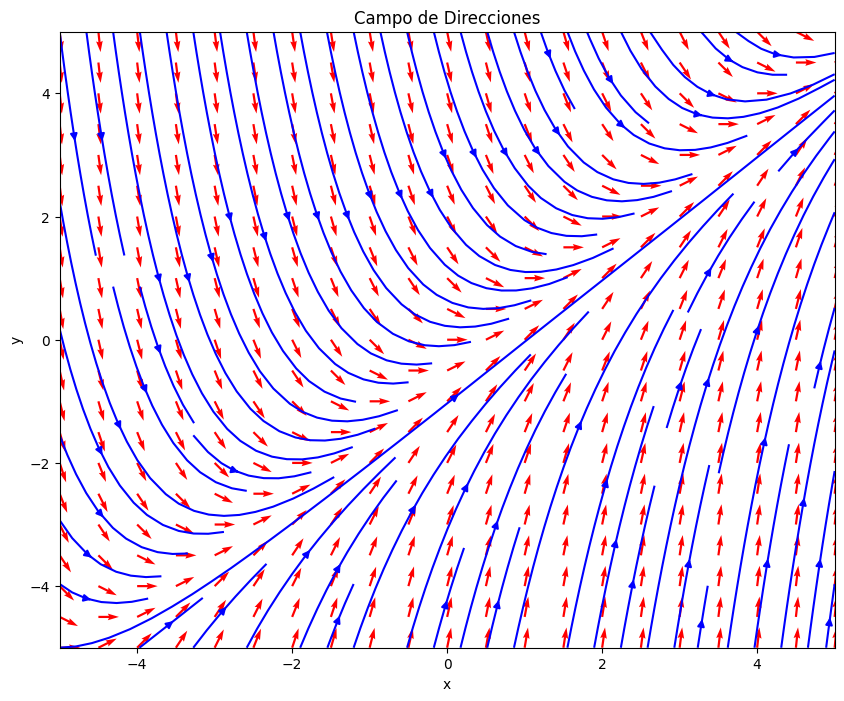

In [3]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

In [4]:
def f(x, y):
    return ((-y**2) - (y) -2)*((1-y)**2)

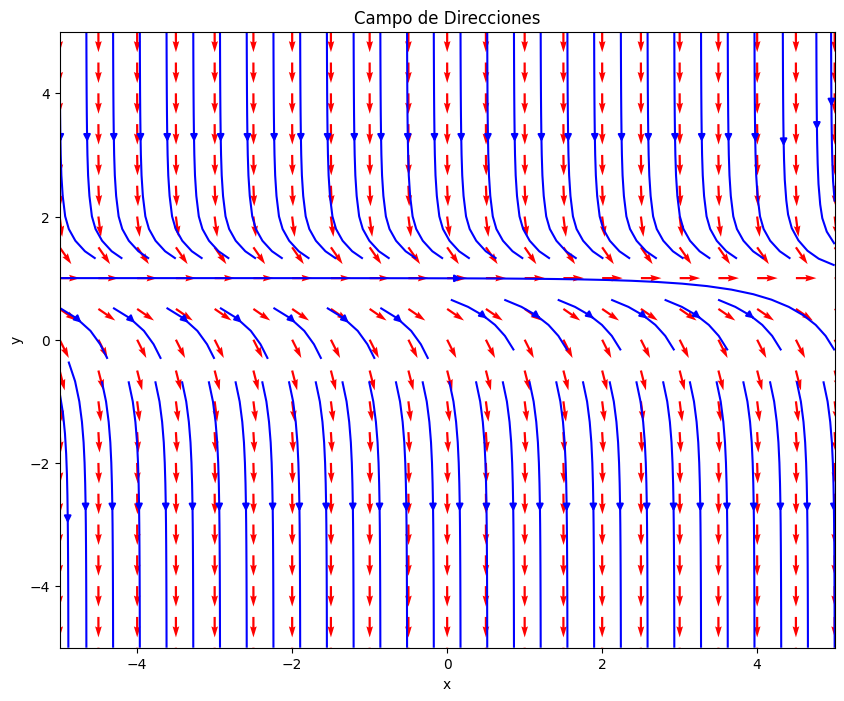

In [5]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

In [6]:
def f(x, y):
    return (y + 2)*(y-4)

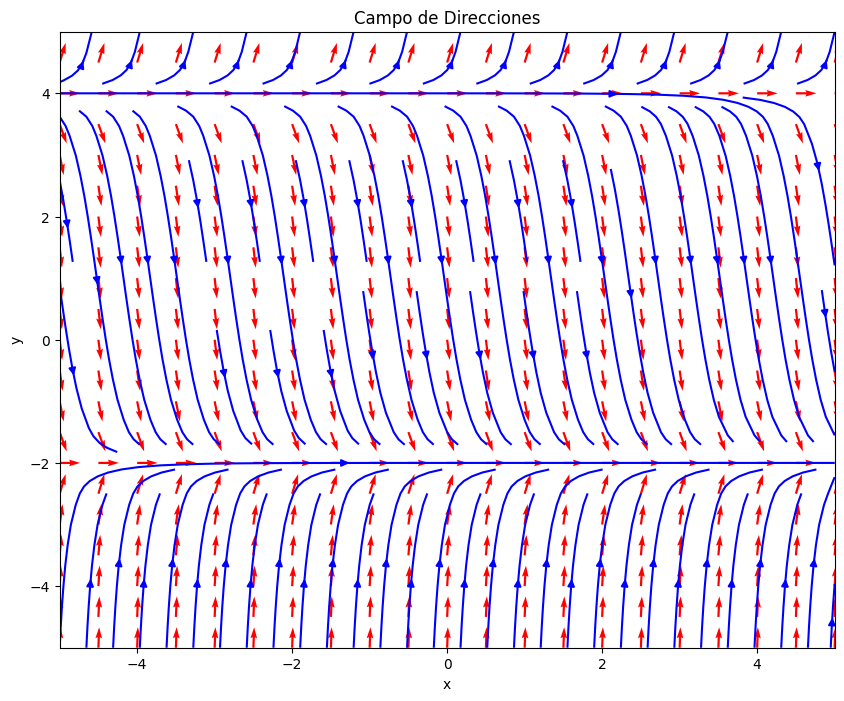

In [7]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

In [8]:
def f(x, y):
    return x*y

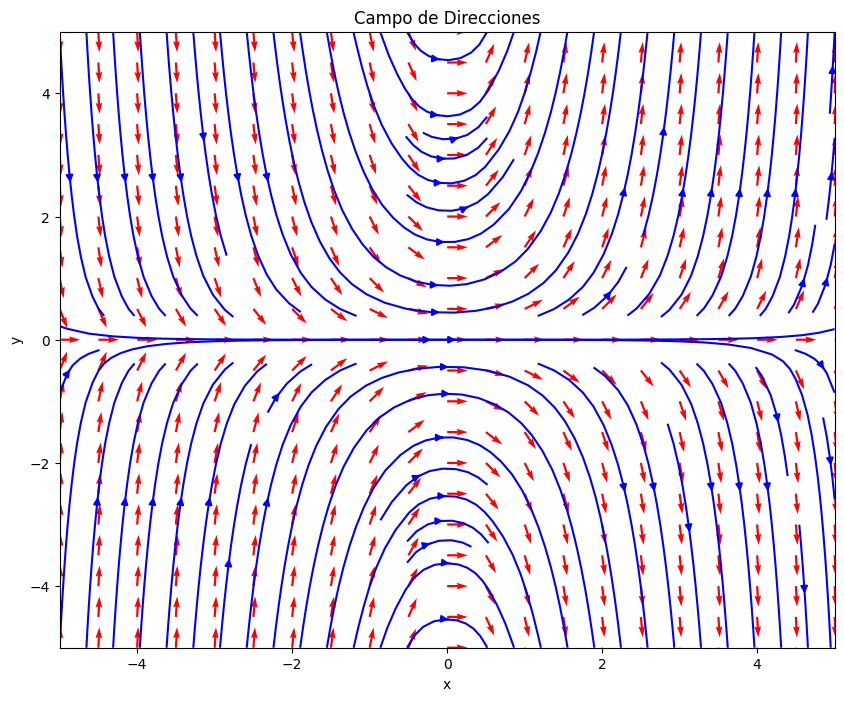

In [9]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

In [10]:
def f(x, y):
    return -x*y

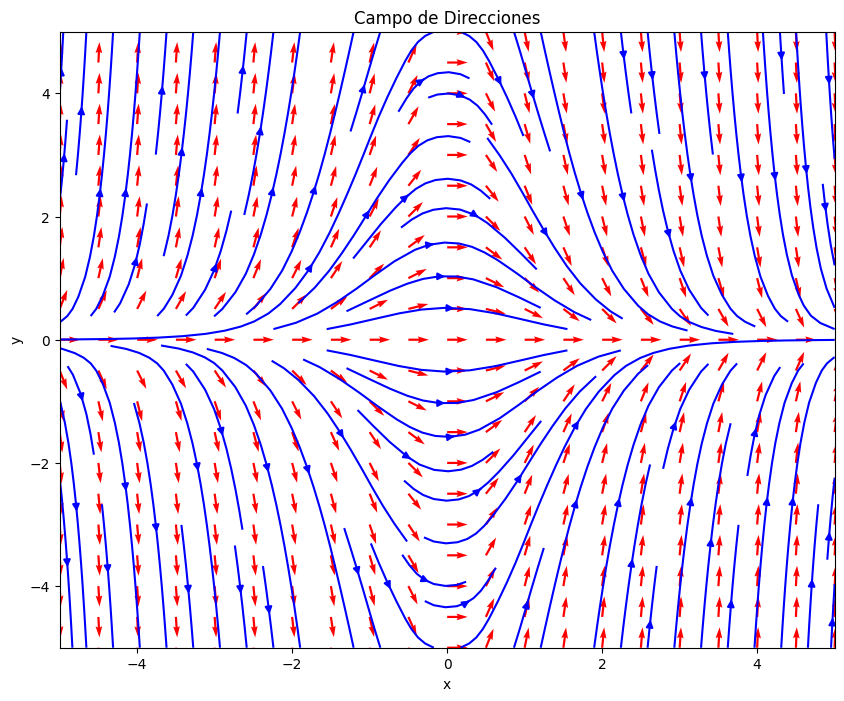

In [11]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

In [12]:
def f(x, y):
    return 1*y

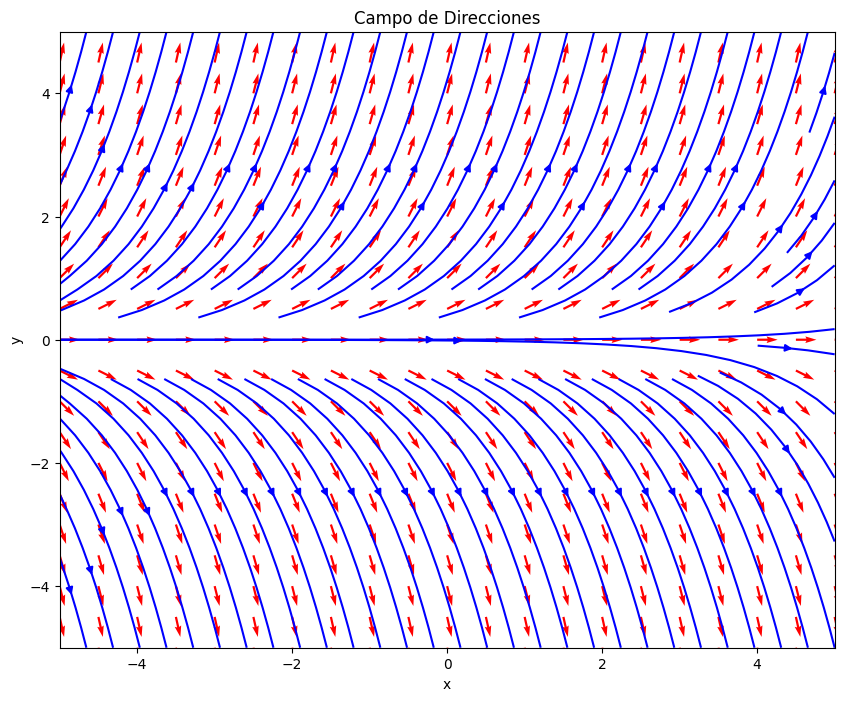

In [13]:
plot_direction_field(f, xmin=-5, xmax=5, ymin=-5, ymax=5, xstep=0.5, ystep=0.5, unit=True, plot_streamlines=True)

Parte 4


In [45]:

def edoPart4(x, y, dy_dx):
    numerator = (x - 3*y - 3*(x**2 - y**2) + 3*x*y)
    denominator = (2*x - y + 3*(x**2 - y**2) + 2*x*y)
    return numerator / denominator


Inciso a

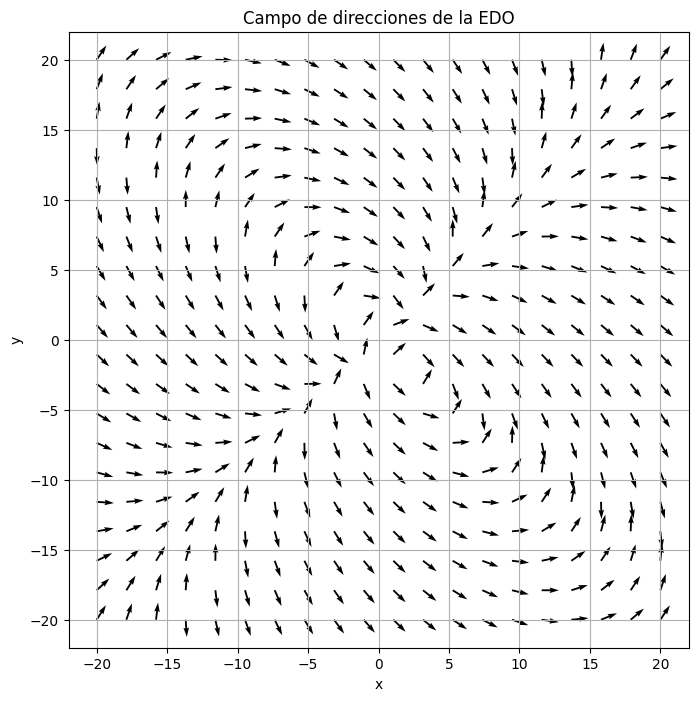

In [69]:

x = np.linspace(-20, 20, 20)
y = np.linspace(-20, 20, 20)

X, Y = np.meshgrid(x, y)

U = np.ones_like(X)
V = np.zeros_like(Y)

for i in range(len(x)):
    for j in range(len(y)):
        try:
            V[i, j] = edoPart4(X[i, j], Y[i, j], 1) 
        except ZeroDivisionError:
            V[i, j] = 0

N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U2, V2, angles='xy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de direcciones de la EDO')
plt.grid()
plt.show()


Inciso B

In [57]:
def rungekutta(f, x0, y0, x_end, h, direction=1):
    x = np.arange(x0, x_end, h*direction)
    if direction == -1:  # Si vamos hacia atrás, revertimos el orden del array
        x = x[::-1]
    y = np.zeros(len(x))
    y[0] = y0
    
    for i in range(1, len(x)):
        k1 = h * f(x[i-1], y[i-1], (y[i-1]-y[i-2])/h if i>1 else 1)
        k2 = h * f(x[i-1] + h/2, y[i-1] + k1/2, (y[i-1]+k1/2 - y[i-2])/h if i>1 else 1)
        k3 = h * f(x[i-1] + h/2, y[i-1] + k2/2, (y[i-1]+k2/2 - y[i-2])/h if i>1 else 1)
        k4 = h * f(x[i-1] + h, y[i-1] + k3, (y[i-1]+k3 - y[i-2])/h if i>1 else 1)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    if direction == -1:  # Si vamos hacia atrás, revertimos el orden del array
        x = x[::-1]
        y = y[::-1]
    
    return x, y

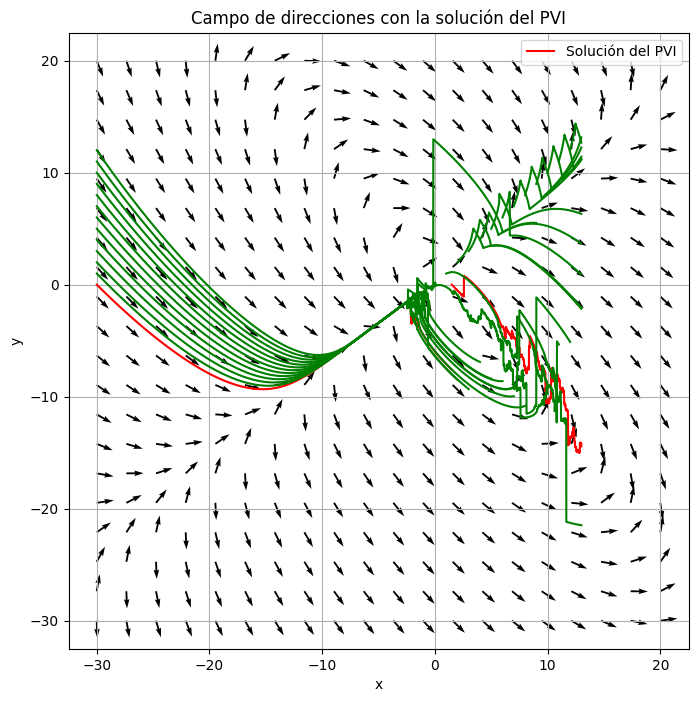

In [96]:
x = np.linspace(-30, 20, 20)
y = np.linspace(-30, 20, 20)

X, Y = np.meshgrid(x, y)

U = np.ones_like(X)
V = np.zeros_like(Y)

for i in range(len(x)):
    for j in range(len(y)):
        try:
            V[i, j] = f(X[i, j], Y[i, j], 1) 
        except ZeroDivisionError:
            V[i, j] = 0

N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

x0, y0 = 1.5, 0
x_end_forward = 13
x_end_backward = -30
h = 0.01
x_sol_forward, y_sol_forward = rungekutta(f, x0, y0, x_end_forward, h, direction=1)
x_sol_backward, y_sol_backward = rungekutta(f, x0, y0, x_end_backward, h, direction=-1)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U2, V2, angles='xy')
plt.plot(x_sol_forward, y_sol_forward, 'r', label='Solución del PVI')
plt.plot(x_sol_backward, y_sol_backward, 'r')


for x in range(1,13):
    x0, y0 = x, x
    x_sol_forward, y_sol_forward = rungekutta(f, x0, y0, x_end_forward, h, direction=1)
    x_sol_backward, y_sol_backward = rungekutta(f, x0, y0, x_end_backward, h, direction=-1)

    plt.plot(x_sol_forward, y_sol_forward, 'g')
    plt.plot(x_sol_backward, y_sol_backward, 'g')



plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de direcciones con la solución del PVI')
plt.legend()
plt.grid()
plt.show()

Parte 5

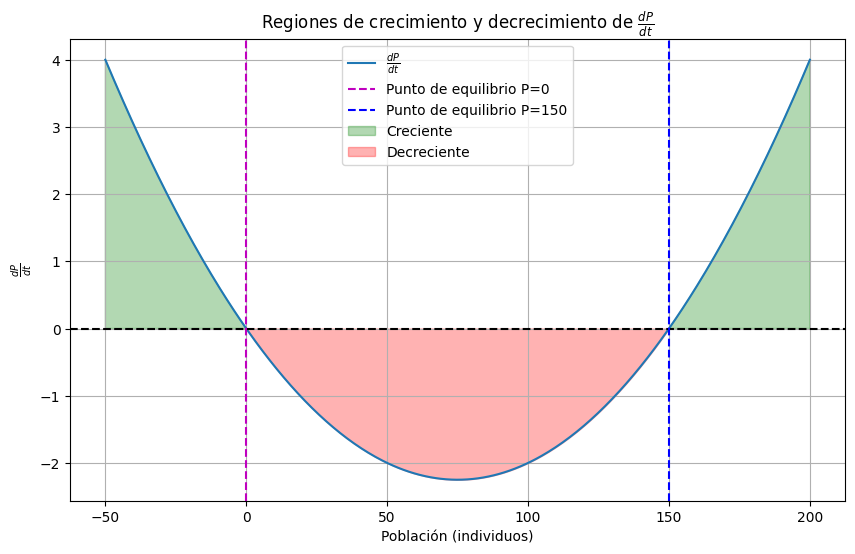

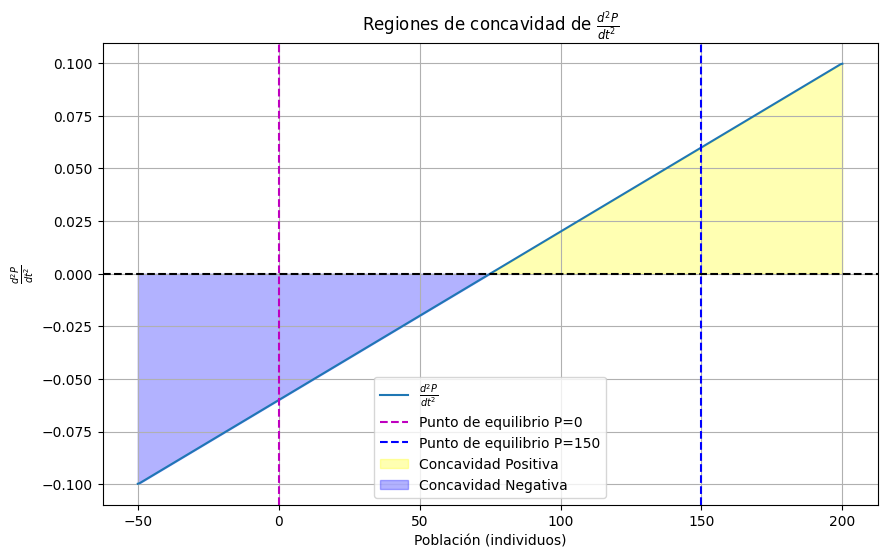

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la EDO
def model(P, t):
    return 0.0004 * P**2 - 0.06 * P

# Rango de valores para P
P = np.linspace(-50, 200, 400)

# Evaluar dP/dt para estos valores de P
dP_dt = 0.0004 * P**2 - 0.06 * P

# Graficar dP/dt contra P
plt.figure(figsize=(10, 6))
plt.plot(P, dP_dt, label=r"$\frac{dP}{dt}$")
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='m', linestyle='--', label='Punto de equilibrio P=0')
plt.axvline(x=150, color='b', linestyle='--', label='Punto de equilibrio P=150')
plt.fill_between(P, dP_dt, where=(P > 150) | (P < 0), color='green', alpha=0.3, label='Creciente')
plt.fill_between(P, dP_dt, where=(P > 0) & (P < 150), color='red', alpha=0.3, label='Decreciente')
plt.xlabel('Población (individuos)')
plt.ylabel(r"$\frac{dP}{dt}$")
plt.title(r"Regiones de crecimiento y decrecimiento de $\frac{dP}{dt}$")
plt.legend()
plt.grid(True)
plt.show()

# Analizar concavidad usando la segunda derivada
def d2P_dt2(P):
    dPdt = 0.0004 * P**2 - 0.06 * P
    return np.gradient(dPdt, P)

# Evaluar la segunda derivada
d2P_dt2_values = d2P_dt2(P)

# Graficar la segunda derivada
plt.figure(figsize=(10, 6))
plt.plot(P, d2P_dt2_values, label=r"$\frac{d^2P}{dt^2}$")
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='m', linestyle='--', label='Punto de equilibrio P=0')
plt.axvline(x=150, color='b', linestyle='--', label='Punto de equilibrio P=150')
plt.fill_between(P, d2P_dt2_values, where=(d2P_dt2_values > 0), color='yellow', alpha=0.3, label='Concavidad Positiva')
plt.fill_between(P, d2P_dt2_values, where=(d2P_dt2_values < 0), color='blue', alpha=0.3, label='Concavidad Negativa')
plt.xlabel('Población (individuos)')
plt.ylabel(r"$\frac{d^2P}{dt^2}$")
plt.title(r"Regiones de concavidad de $\frac{d^2P}{dt^2}$")
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


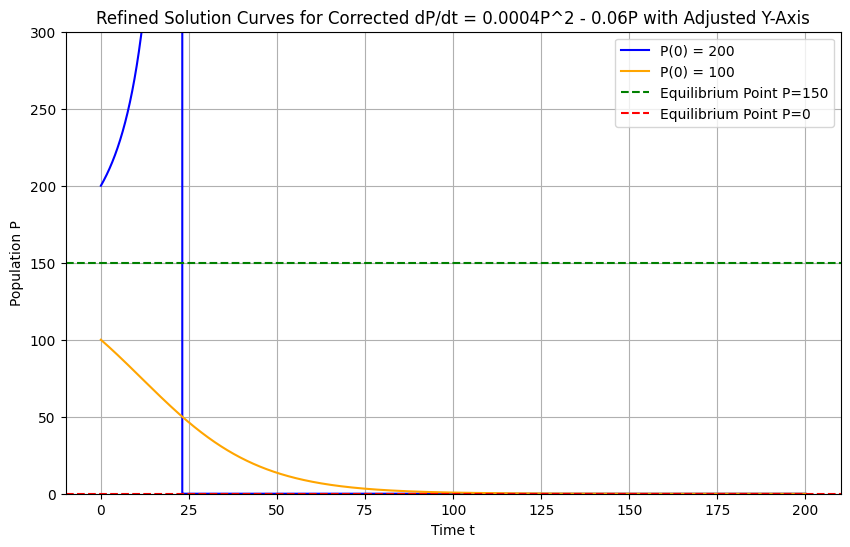

In [79]:
# Adjust y-axis limits and focus on a shorter time range to improve interpretability
t_short = np.linspace(0, 200, 100000)  # finer integration with smaller step size

P0_200 = 200
P0_100 = 100

# Solve ODE with refined time steps for the corrected equation
P_200_short = odeint(model, P0_200, t_short)
P_100_short = odeint(model, P0_100, t_short)


# Plotting the solutions for the corrected equation with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(t_short, P_200_short, label='P(0) = 200', color='blue')
plt.plot(t_short, P_100_short, label='P(0) = 100', color='orange')
plt.axhline(y=150, color='green', linestyle='--', label='Equilibrium Point P=150')
plt.axhline(y=0, color='red', linestyle='--', label='Equilibrium Point P=0')
plt.ylim([0, 300])  # Adjusted y-axis for better visualization
plt.xlabel('Time t')
plt.ylabel('Population P')
plt.title('Refined Solution Curves for Corrected dP/dt = 0.0004P^2 - 0.06P with Adjusted Y-Axis')
plt.legend()
plt.grid(True)
plt.show()
